# Creating an AI to solve a maze with Q-learning

## Gym: https://github.com/MattChanTK/gym-maze

Emil Salmi

### Learn and explore constrains

In [1]:
def explore(t):
    # return explore either min_explore or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the explore goes down all the way to 0.001
    return max(min_explore, min(0.8, 1.0 - math.log10((t+1)/decay)))


def learn(t):
    # return max amount of either min learn or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the learn rate goes down - all the way to the min_learn(0.2)
    return max(min_learn, min(0.8, 1.0 - math.log10((t+1)/decay)))


### Select next action

In [2]:
def next_action(state, explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action


### Save state to bucket

In [3]:
def state_bucket(state):
    bucket = []
    # Loop state(position),[0 0] at start
    for i in range(len(state)):
        if state[i] <= bounds[i][0]:
            bucket_i = 0
        elif state[i] >= bounds[i][1]:
            bucket_i = buckets[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = bounds[i][1] - bounds[i][0]
            offset = (buckets[i]-1)*bounds[i][0]/bound_width
            scaling = (buckets[i]-1)/bound_width
            bucket_i = int(round(scaling*state[i] - offset))
        bucket.append(bucket_i)
    return tuple(bucket)


### Run simulation

In [4]:
import sys
import numpy as np
import math
import random

import gym
import gym_maze



In [5]:

def simulate():
    
    # Init learning and explore parameters
    learning_rate = learn(0)
    explore_rate = explore(0)
    discount_factor = 0.99
    streak = 0

    # Render the maze
    env.render()

    # Loop for number of episodes
    for episode in range(episodes):

        # Reset the environment
        res = env.reset()

        # Initial state
        state_0 = state_bucket(res)
        reward_sum = 0




In [ ]:
    # Loop for number of episodes
    for episode in range(episodes):

        # Reset the environment
        obsv = env.reset()

        # Initial state
        state_0 = state_bucket(obsv)
        reward_sum = 0

        # Loop max steps
        for t in range(max_steps):

            # Select next action and execute
            action = next_action(state_0, explore_rate)
            obsv, reward, done, _ = env.step(action)

            # Log the action
            state = state_bucket(obsv)
            reward_sum += reward

            # Update Q based on the action
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            # Setup next state
            state_0 = state


In [ ]:
            env.render()

            if env.is_game_over():
                sys.exit()

            if done:
                print(f"Episode: {episode}, steps: {t}, reward: {reward_sum}, streak: {streak}.")
                plot_info.append(reward_sum)
                
                if t <= solved_steps:
                    streak += 1
                else:
                    streak = 0
                break

            elif t >= max_steps - 1:
                print(f"Reached max steps {max_steps}")


    
        # Done when same result is reached n amount of times
        if streak > max_streak:
            break

        # Update explore and learn
        explore_rate = explore(episode)
        learning_rate = learn(episode)


### Create constrains and run

In [6]:
if __name__ == "__main__":
    # Create maze, here using a 10x10 random maze
    env = gym.make("maze-random-10x10-v0")
    plot_info = []
    # Environment costrains
    # Get the size of the maze
    size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int)) # 10, 10
    buckets = size  # one bucket per grid (10, 10)
    # Get number of actions, return Up, Down, Left, Right
    actions = env.action_space.n  
    # Get bounds for space
    bounds = list(zip(env.observation_space.low, env.observation_space.high)) # (0, 9) (0, 9)
    # Learning constrains
    min_explore = 0.001
    min_learn = 0.2
    decay = np.prod(size, dtype=float) / 10.0 
    # Constrains for simulation
    episodes = 50000
    max_steps = np.prod(size, dtype=int) * 100
    max_streak = 100
    solved_steps = np.prod(size, dtype=int)
    # Create Q-table for each state and action
    q_table = np.zeros(buckets + (actions,), dtype=float)
    # Run simulation
    simulate()


pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
Episode: 0, steps: 3683, reward: -2.6829999999997054, streak: 0.
Episode: 1, steps: 914, reward: 0.0859999999999993, streak: 0.
Episode: 2, steps: 369, reward: 0.6309999999999998, streak: 0.
Episode: 3, steps: 217, reward: 0.7829999999999998, streak: 0.
Episode: 4, steps: 1222, reward: -0.22199999999997622, streak: 0.
Episode: 5, steps: 140, reward: 0.8599999999999999, streak: 0.
Episode: 6, steps: 553, reward: 0.4469999999999996, streak: 0.
Episode: 7, steps: 259, reward: 0.7409999999999999, streak: 0.
Episode: 8, steps: 142, reward: 0.8579999999999999, streak: 0.
Episode: 9, steps: 1512, reward: -0.5119999999999443, streak: 0.
Episode: 10, steps: 115, reward: 0.8849999999999999, streak: 0.
Episode: 11, steps: 130, reward: 0.8699999999999999, streak: 0.
Episode: 12, steps: 176, reward: 0.8239999999999998, streak: 0.
Episode: 13, steps: 87, reward: 0.9129999999999999, streak:

In [3]:
import sys
import numpy as np
import math
import random

import gym
import gym_maze


def simulate():

    # Init learning and explore parameters
    learning_rate = learn(0)
    explore_rate = explore(0)
    discount_factor = 0.99

    streak = 0

    # Render the maze
    env.render()

    # Loop for number of episodes
    for episode in range(episodes):

        # Reset the environment
        obsv = env.reset()

        # Initial state
        state_0 = state_bucket(obsv)
        reward_sum = 0

        # Loop max steps
        for t in range(max_steps):

            # Select next action and execute
            action = next_action(state_0, explore_rate)
            obsv, reward, done, _ = env.step(action)

            # Log the action
            state = state_bucket(obsv)
            reward_sum += reward

            # Update Q based on the action
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            # Setup next state
            state_0 = state


            env.render()

            if env.is_game_over():
                sys.exit()

            if done:
                print(f"Episode: {episode}, steps: {t}, reward: {reward_sum}, streak: {streak}.")
                plot_info.append(reward_sum)
                
                if t <= solved_steps:
                    streak += 1
                else:
                    streak = 0
                break

            elif t >= max_steps - 1:
                print(f"Reached max steps {max_steps}")

        # Done when same result is reached n amount of times
        if streak > max_streak:
            break

        # Update explore and learn
        explore_rate = explore(episode)
        learning_rate = learn(episode)


def next_action(state, explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action


def explore(t):
    # return explore either min_explore or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the explore goes down all the way to 0.001
    return max(min_explore, min(0.8, 1.0 - math.log10((t+1)/decay)))


def learn(t):
    # return max amount of either min learn or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the learn rate goes down - all the way to the min_learn(0.2)
    return max(min_learn, min(0.8, 1.0 - math.log10((t+1)/decay)))


def state_bucket(state):
    bucket = []
    # Loop state[0 0] at start
    for i in range(len(state)):
        if state[i] <= bounds[i][0]:
            bucket_i = 0
        elif state[i] >= bounds[i][1]:
            bucket_i = buckets[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = bounds[i][1] - bounds[i][0]
            offset = (buckets[i]-1)*bounds[i][0]/bound_width
            scaling = (buckets[i]-1)/bound_width
            bucket_i = int(round(scaling*state[i] - offset))
        bucket.append(bucket_i)
    return tuple(bucket)


if __name__ == "__main__":

    # Create maze, here using a 10x10 random maze
    env = gym.make("maze-random-10x10-v0")

    plot_info = []

    # Environment costrains
    # Get the size of the maze
    size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    buckets = size  # one bucket per grid

    # Get number of actions, return Up, Down, Left, Right
    actions = env.action_space.n  
    # Get bounds for space
    bounds = list(zip(env.observation_space.low, env.observation_space.high))

    # Learning constrains
    min_explore = 0.001
    min_learn = 0.2

    decay = np.prod(size, dtype=float) / 10.0
    
    # Constrains for simulation
    episodes = 5000
    max_steps = np.prod(size, dtype=int) * 100
    max_streak = 100
    solved_steps = np.prod(size, dtype=int)

    # Create Q-table for each state and action
    q_table = np.zeros(buckets + (actions,), dtype=float)


    # Run simulation
    simulate()


pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
Episode: 0, steps: 768, reward: 0.23199999999999943, streak: 0.
Episode: 1, steps: 3832, reward: -2.831999999999689, streak: 0.
Episode: 2, steps: 757, reward: 0.24299999999999944, streak: 0.
Episode: 3, steps: 5363, reward: -4.363000000000126, streak: 0.
Episode: 4, steps: 638, reward: 0.36199999999999954, streak: 0.
Episode: 5, steps: 188, reward: 0.8119999999999998, streak: 0.
Episode: 6, steps: 590, reward: 0.4099999999999996, streak: 0.
Episode: 7, steps: 1975, reward: -0.9749999999998933, streak: 0.
Episode: 8, steps: 437, reward: 0.5629999999999997, streak: 0.
Episode: 9, steps: 310, reward: 0.6899999999999997, streak: 0.
Episode: 10, steps: 471, reward: 0.5289999999999997, streak: 0.
Episode: 11, steps: 285, reward: 0.7149999999999999, streak: 0.
Episode: 12, steps: 644, reward: 0.35599999999999954, streak: 0.
Episode: 13, steps: 157, reward: 0.8429999999999999, strea

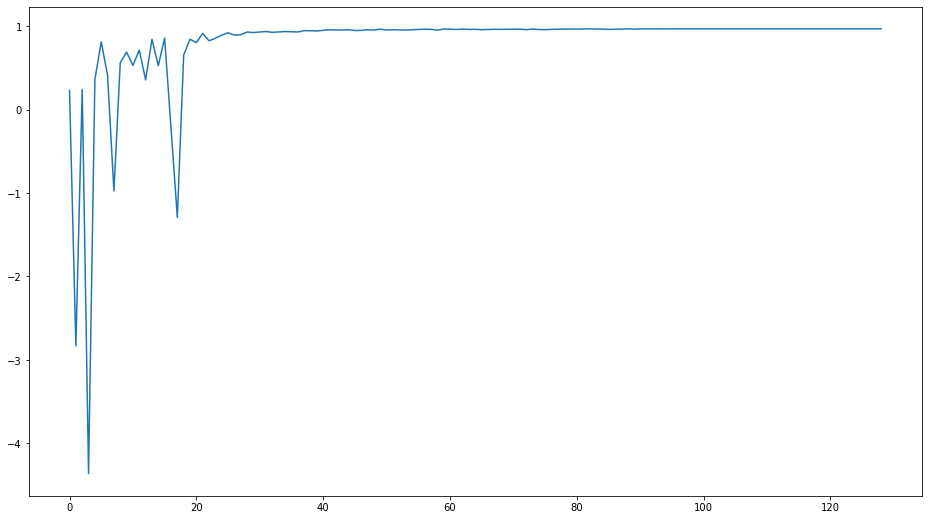

In [4]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(16,9))
plt.plot(plot_info)